In [345]:
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib.gridspec as gs
duration = 2.3 # [T] = ms -> [rate] = kHz
from matplotlib.lines import Line2D
%matplotlib notebook
import seaborn as sns

def pseudo_adc_conversion_analog(adc_set, round_until=1):
    """
    returns the voltage in mV measured for the value set in the c programm

    :param adc_set: int, limits: (0,1022)
    :param round_until:
    :return:
    """
    if isinstance(adc_set, (list, np.ndarray)):
        if (adc_set > 1022).any() or (adc_set < 0).any():
            raise ValueError("adc_set can only be within 0 and 1022")
    elif adc_set > 1022 or adc_set < 0:
        raise ValueError("adc_set can only be within 0 and 1022")
    return np.round(1.748648648648649 * adc_set + 14.162162162162161, decimals=round_until)

def pseudo_adc_conversion(digital_pseudo_unit):
    # converts the digital value of the adc into millivolt
    # see ipython notebook: Pseudo ADC Calibration
    return 0.681 * digital_pseudo_unit - 865.713


NUM_COLORS = 12
colors = sns.color_palette("hls", NUM_COLORS)
# ax.set_color_cycle([scalarMap.to_rgba(i) for i in range(NUM_COLORS)])

In [346]:
files = ["output_spikes_1573574858.npy","output_spikes_1573574960.npy","output_spikes_1573575034.npy","output_spikes_1573575179.npy"]
data = np.zeros((4, 4, 37,32))
for i, f in enumerate(files):
    data[i] = true_output_spike_rate(np.load(f))/1e3
    
def true_input_spike_rate(input_rate):
    return input_rate*2.3e-3
def true_output_spike_rate(output_rate):
    return output_rate/2.3e-3

# input rates
input_weights = [5,15,30,60]
input_rates = true_input_spike_rate(np.linspace(-560, 560, 37))*1e3

<IPython.core.display.Javascript object>


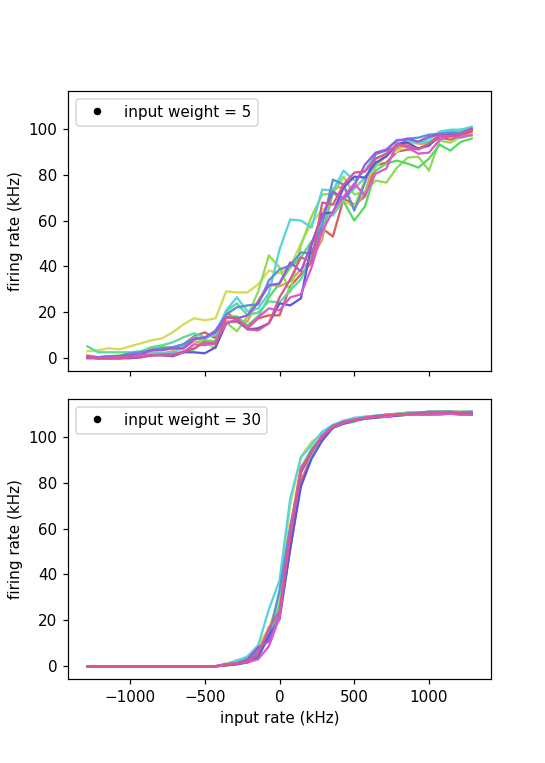

In [372]:
mmnt = 0
fig, axes = plt.subplots(nrows=2, figsize =(5,7), sharey=True, sharex=True)
  
for i, n_params in enumerate([0,2]):
    ax = axes[i]
    ax.set_prop_cycle(color=colors)
    ax.set_ylabel("firing rate (kHz)")
    ax.plot(input_rates,data[mmnt,n_params,:,0:12])
    ax.legend([Line2D([0],[0], marker='o', color="w", markerfacecolor="black")],["input weight = {}".format(input_weights[n_params])], loc="upper left")
ax.set_xlabel("input rate (kHz)")
plt.subplots_adjust(hspace=0.1)
plt.savefig("calibrated_activation_function_input.png",transparent=True, bbox_inches="tight")

<IPython.core.display.Javascript object>


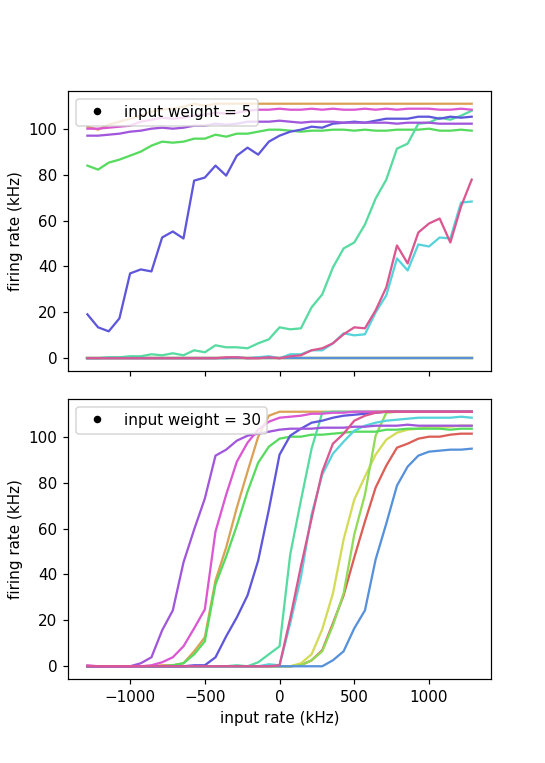

In [373]:
mmnt = 2
fig, axes = plt.subplots(nrows=2, figsize =(5,7), sharey=True, sharex=True)
for i, n_params in enumerate([0,2]):
    ax = axes[i]
    ax.set_prop_cycle(color=colors)
    ax.set_ylabel("firing rate (kHz)")
    ax.plot(input_rates,data[mmnt,n_params,:,0:12])
    ax.legend([Line2D([0],[0], marker='o', color="w", markerfacecolor="black")],["input weight = {}".format(input_weights[n_params])], loc="upper left")
ax.set_xlabel("input rate (kHz)")
plt.subplots_adjust(hspace=0.1)
plt.savefig("uncalibrated_activation_function_input.png",transparent=True, bbox_inches="tight")

<IPython.core.display.Javascript object>


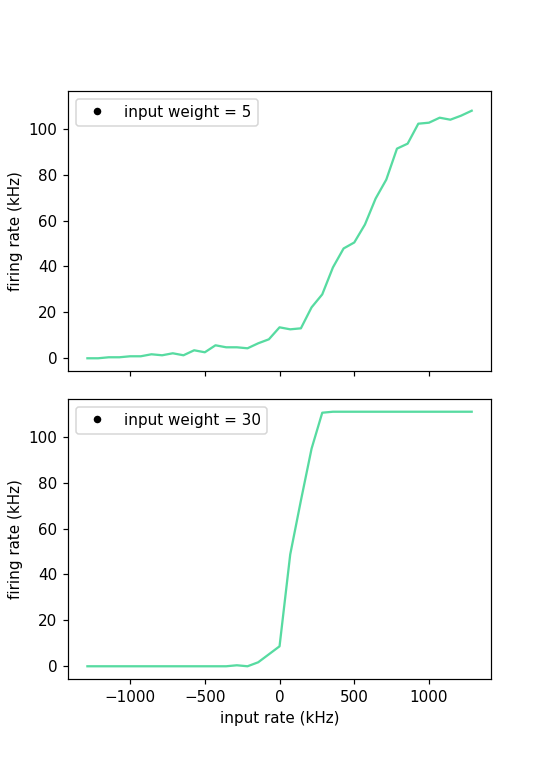

In [374]:
mmnt = 2
fig, axes = plt.subplots(nrows=2, figsize =(5,7), sharey=True, sharex=True)
for i, n_params in enumerate([0,2]):
    ax = axes[i]
    ax.set_prop_cycle(color=colors)
    ax.set_ylabel("firing rate (kHz)")
    for j in range(12):
        alpha = 0
        if j == 5:
            alpha = 1
        ax.plot(input_rates,data[mmnt,n_params,:,j], alpha = alpha)
    ax.legend([Line2D([0],[0], marker='o', color="w", markerfacecolor="black")],["input weight = {}".format(input_weights[n_params])], loc="upper left")
ax.set_xlabel("input rate (kHz)")
plt.subplots_adjust(hspace=0.1)
plt.savefig("uncalibrated_activation_function_input_single.png",transparent=True, bbox_inches="tight")

<IPython.core.display.Javascript object>


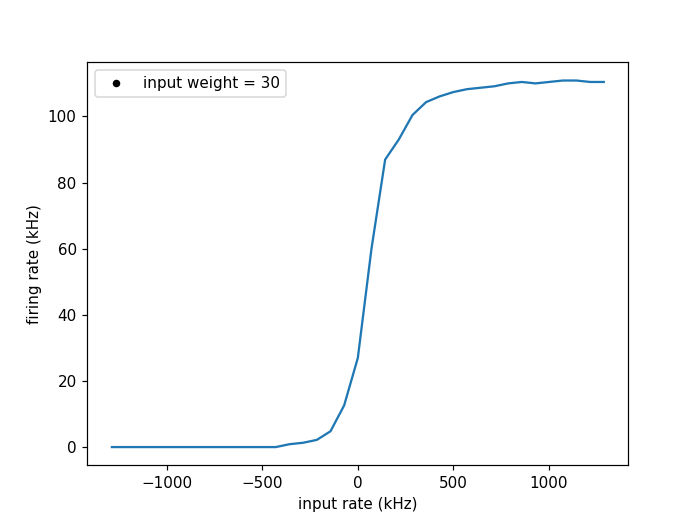

In [335]:
mmnt = 0
n_params = 2
figure = plt.figure()    
plt.ylabel("firing rate (kHz)")
plt.xlabel("input rate (kHz)")
plt.plot(input_rates,data[mmnt,n_params,:,1])
plt.legend([Line2D([0],[0], marker='o', color="w", markerfacecolor="black")],
           ["input weight = {}".format(input_weights[n_params])])

plt.savefig("single_calibrated_activation_function_input_w{}.png".format(input_weights[n_params]),transparent=True, bbox_inches="tight")

## Activation Function Origin

In [336]:
mmnts = ["membrane_data_0.npy", "membrane_data_1.npy"]
input_rates = [0, true_input_spike_rate(100)]
noise_rates = true_input_spike_rate(70)
full_data = np.zeros((2,26137))
for i in range(2):
    full_data[i] = np.load(mmnts[i])[:26137]

from scipy.stats import entropy
import pandas as pd
    
def gaus(x, mue, sig):
    return np.exp(-(x - mue) ** 2 / (2 * sig ** 2)) / sig / np.sqrt(2 * np.pi)

<IPython.core.display.Javascript object>


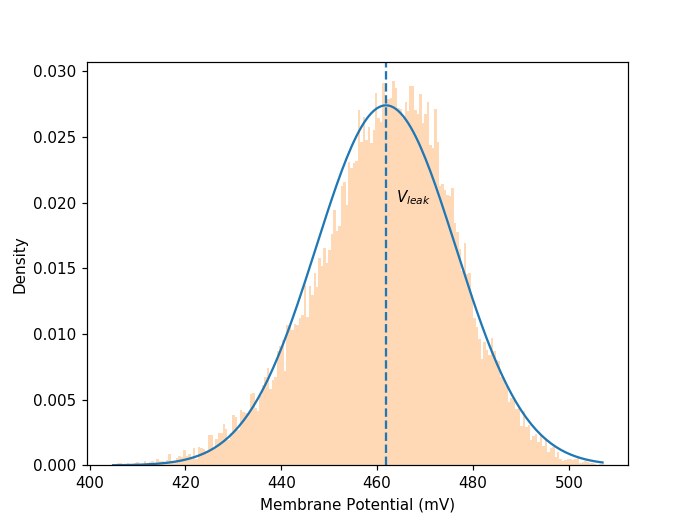

In [386]:
fig, axes = plt.subplots(nrows=1)
for i in range(1):
    ax = axes
    kullback_leibler_divergence = []
    data = pd.Series(full_data[i]).dropna()
    y, x = np.histogram(data, bins=200)
    x = x[1:] - (x[1] - x[0]) / 2
    std = data.std()
    mean = data.mean()
    kb_lb_entropy = entropy(y, gaus(x, mean, std))
    kullback_leibler_divergence +=  [kb_lb_entropy, ]
    ax.set_ylabel("Density")
    
    ax.plot(x, gaus(x, mean, std))
    ax.axvline(mean, linestyle="--")
    ax.text(mean+2, 0.02,'$V_{leak}$')
    ax.hist(data,bins=200,alpha=0.3, density=True)
    #ax.legend(["Gaussian Fit", "$V_{leak}$", "Histogram"], loc="upper left")
ax.set_xlabel("Membrane Potential (mV)")
plt.savefig("activation_function_vmem_distr.png",transparent=True, bbox_inches="tight")

<IPython.core.display.Javascript object>


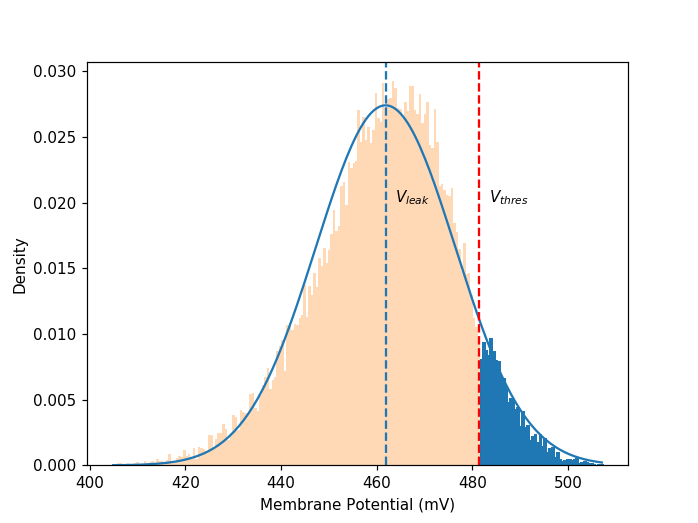

In [394]:
fig, axes = plt.subplots(nrows=1)
for i in range(1):
    ax = axes
    kullback_leibler_divergence = []
    data = pd.Series(full_data[i]).dropna()
    y, x = np.histogram(data, bins=200)
    x = x[1:] - (x[1] - x[0]) / 2
    std = data.std()
    mean = data.mean()
    kb_lb_entropy = entropy(y, gaus(x, mean, std))
    kullback_leibler_divergence +=  [kb_lb_entropy, ]
    
    y_normed, _ = np.histogram(data, bins=200, density=True)
    ax.set_ylabel("Density")
    
    mean_stored = mean
    ax.plot(x, gaus(x, mean, std))
    ax.axvline(mean, linestyle="--")
    ax.text(mean+2, 0.02,'$V_{leak}$')
    ax.hist(data,bins=200,alpha=0.3, density=True)
    ax.axvline(x[150-1], linestyle="--", color="red")
    ax.text(x[150-1]+2, 0.02,'$V_{thres}$')
    ax.bar(x[150:], y_normed[150:])
    
    #ax.legend(["Gaussian Fit", "$V_{leak}$", "$V_{thres}$", "Histogram", "Spiking"], loc="upper left")
ax.set_xlabel("Membrane Potential (mV)")
plt.savefig("activation_function_vmem_distr_with_thres.png",transparent=True, bbox_inches="tight")

<IPython.core.display.Javascript object>


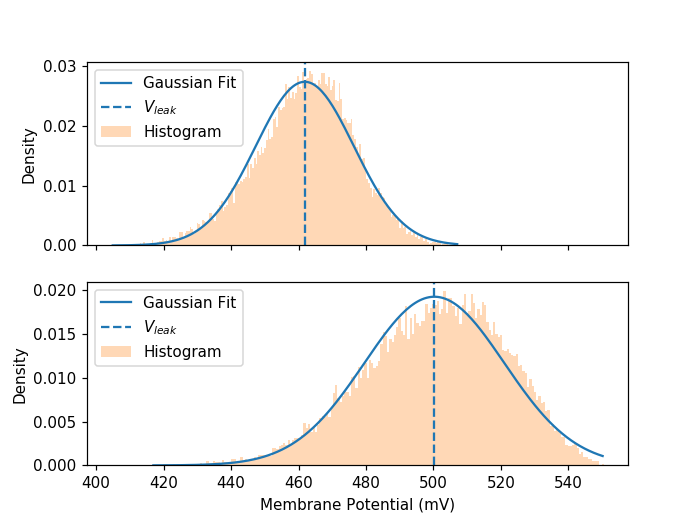

In [389]:
fig, axes = plt.subplots(nrows=2, sharex=True)
for i in range(2):
    ax = axes[i]
    kullback_leibler_divergence = []
    data = pd.Series(full_data[i]).dropna()
    y, x = np.histogram(data, bins=200)
    x = x[1:] - (x[1] - x[0]) / 2
    std = data.std()
    mean = data.mean()
    kb_lb_entropy = entropy(y, gaus(x, mean, std))
    kullback_leibler_divergence +=  [kb_lb_entropy, ]
    ax.set_ylabel("Density")
    
    ax.plot(x, gaus(x, mean, std))
    ax.axvline(mean, linestyle="--")
    
    ax.hist(data,bins=200,alpha=0.3, density=True)
    ax.legend(["Gaussian Fit", "$V_{leak}$", "Histogram"], loc="upper left")
ax.set_xlabel("Membrane Potential (mV)")
plt.savefig("activation_function_vmem_distr_with_input.png",transparent=True, bbox_inches="tight")

<IPython.core.display.Javascript object>


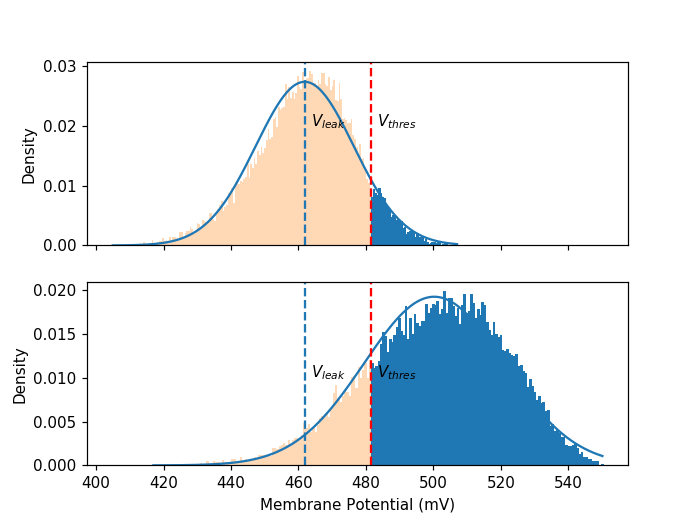

In [395]:
fig, axes = plt.subplots(nrows=2, sharex=True)
for i in range(2):
    ax = axes[i]
    kullback_leibler_divergence = []
    data = pd.Series(full_data[i]).dropna()
    y, x = np.histogram(data, bins=200)
    x = x[1:] - (x[1] - x[0]) / 2
    std = data.std()
    mean = data.mean()
    kb_lb_entropy = entropy(y, gaus(x, mean, std))
    kullback_leibler_divergence +=  [kb_lb_entropy, ]
    
    
    ax.set_ylabel("Density")
    ax.plot(x, gaus(x, mean, std))
    ax.axvline(mean_stored, linestyle="--"),
    ax.hist(data,bins=200,alpha=0.3, density=True)
    
    y_normed, _ = np.histogram(data, bins=200, density=True)
    if i == 0:
        threshold = x[150-1]
        ax.axvline(x[150-1], linestyle="--", color="red")
        
        ax.text(mean_stored+2, 0.02,'$V_{leak}$')
        ax.text(x[150-1]+2, 0.02,'$V_{thres}$')
        ax.bar(x[150:], y_normed[150:]) 
        #ax.legend(["Gaussian Fit", "$V_{leak}$", "$V_{thres}$", "Histogram", "Spiking"], loc="upper left")
    else:
        idx = np.argwhere(x>threshold).T[0]
        ax.axvline(threshold, linestyle="--", color="red")
        ax.text(threshold+2, 0.010,'$V_{thres}$')
        ax.text(mean_stored+2, 0.010,'$V_{leak}$')
        ax.bar(x[idx], y_normed[idx]) 
        #ax.legend(["Gaussian Fit", "$V_{leak}$", "$V_{thres}$", "Histogram", "Spiking"], loc="upper left")
    
ax.set_xlabel("Membrane Potential (mV)")

plt.savefig("activation_function_vmem_distr_with_input_with_thres.png",transparent=True, bbox_inches="tight")

In [290]:
idx.T

array([[ 98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
        111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
        124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
        137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
        163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
        176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
        189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]])

In [282]:
idx = np.argwhere(x>threshold)

## Threshold as Bias 

In [341]:
mmnts = ["output_spikes_1574183394.npy","output_spikes_1574183702.npy","output_spikes_1574183860.npy"]
data = np.zeros((3,3,37,32))
def true_input_spike_rate(input_rate):
    return input_rate*2.3e-3
def true_output_spike_rate(output_rate):
    return output_rate/2.3e-3
for i, f in enumerate(mmnts):
    data[i] = true_output_spike_rate(np.load(f))/1e3


# input rates
thresholds = [(270,300,330),(250,300,350),(260,300,340)]
thresholds = [(pseudo_adc_conversion_analog(thres[0]), 
               pseudo_adc_conversion_analog(thres[1]),
               pseudo_adc_conversion_analog(thres[2]))
                for thres in thresholds]
input_rates = true_input_spike_rate(np.linspace(-560, 560, 37))*1e3
workpoint = pseudo_adc_conversion_analog(300)

<IPython.core.display.Javascript object>


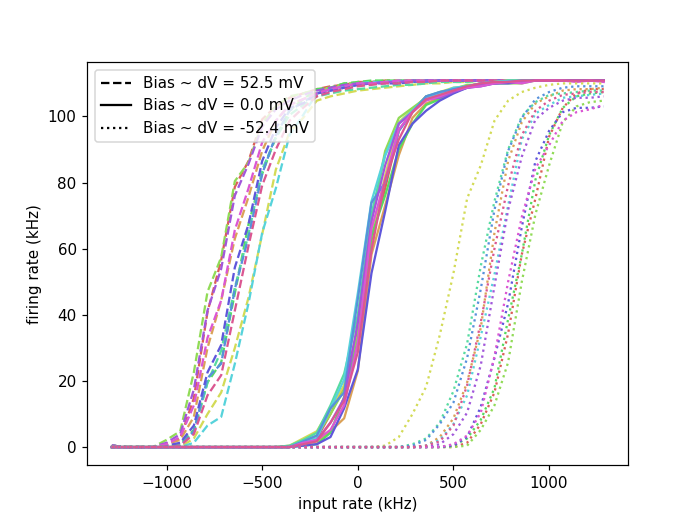

In [342]:
mmnt = 0
n_params = 0
figure = plt.figure()
plt.ylabel("firing rate (kHz)")
plt.xlabel("input rate (kHz)")
figure.gca().set_prop_cycle(color=colors)
styles = ["--", "-", ":"]
    
for i, thres in enumerate(thresholds[mmnt]):
    plt.plot(input_rates,data[mmnt,i,:,0:12], linestyle=styles[i])

plt.legend([Line2D([0],[0], marker='', linestyle=style, color="black") for style in styles],
           ["Bias ~ dV = {} mV".format(np.round(workpoint - t,1)) for t in thresholds[mmnt]], loc="upper left")

plt.savefig("bias_for_activation_function.png",transparent=True, bbox_inches="tight")

<IPython.core.display.Javascript object>


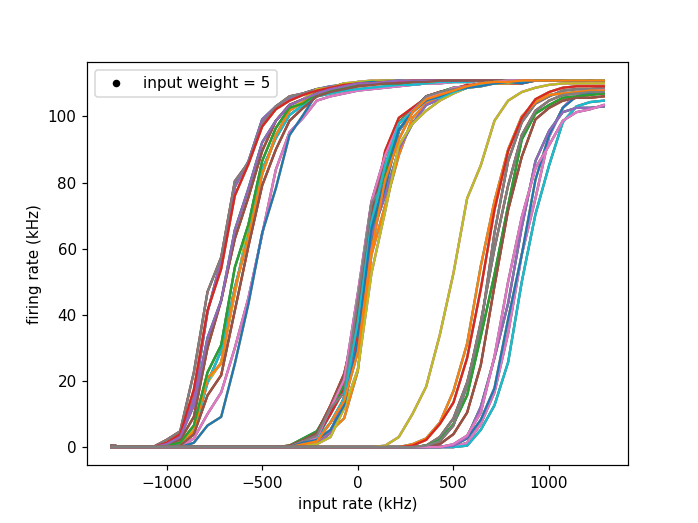

In [343]:
mmnt = 0
n_params = 0
figure = plt.figure()
plt.ylabel("firing rate (kHz)")
plt.xlabel("input rate (kHz)")
for i, thres in enumerate(thresholds[mmnt]):
    plt.plot(input_rates,data[mmnt,i,:,0:12])
    plt.plot(input_rates,data[mmnt,i,:,0:12])
    plt.plot(input_rates,data[mmnt,i,:,0:12])

plt.legend([Line2D([0],[0], marker='o', color="w", markerfacecolor="black")],["input weight = {}".format(input_weights[n_params])])

plt.savefig("calibrated_activation_function_input_w{}.png".format(input_weights[n_params]),transparent=True, bbox_inches="tight")